## 1. Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

## 2. Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Sanjana\ML\Unsupervised ML\KMeans\practise_data.csv")

In [3]:
df[:2]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Checking for null values

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df = df.drop(["CUST_ID"],axis=1)

In [10]:
df[:2]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## 3. Encoding

In [12]:
# df = df.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

## 4. Standard scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaled_df = scaler.fit_transform(df)

In [16]:
scaled_df[:2]

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
        -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
        -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623,
         2.60560451, -1.22175806, -0.67866081, -0.91699519,  0.57396272,
         0.11007385, -0.59179588,  0.68863903,  0.81864213,  0.08931021,
         0.2342269 ,  0.36067954]])

## 5. PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(scaled_df)

PCA()

## 6. Explained variance ratio

In [20]:
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

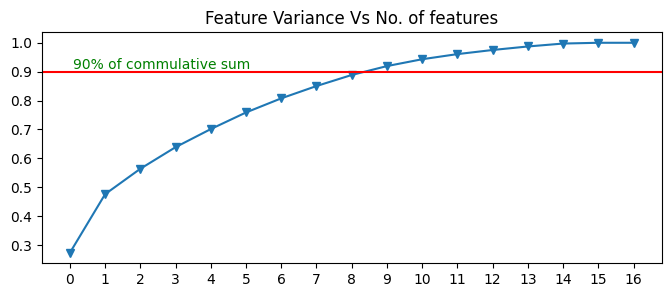

In [21]:
plt.figure(figsize=(8,3))
plt.title("Feature Variance Vs No. of features")
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="v")
plt.axhline(y = 0.90, color="red")
plt.text(0.1, 0.91, "90% of commulative sum", color= "g")
plt.xticks(np.arange(0,17))
plt.show()

In [22]:
pca = PCA(n_components=8)

In [23]:
pc_df = pca.fit_transform(scaled_df)

In [24]:
pc_df[:1]

array([[-1.68222026, -1.07645061, -0.48850652,  0.66555177, -0.01822453,
        -0.05062893, -0.82914441, -0.03930321]])

In [25]:
pc_df.shape

(8950, 8)

## 7. Elbow Method

In [26]:
from sklearn.cluster import KMeans

In [27]:
sse = []
k_range = range(1,9)

In [28]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(pc_df)
    sse.append(km.inertia_)

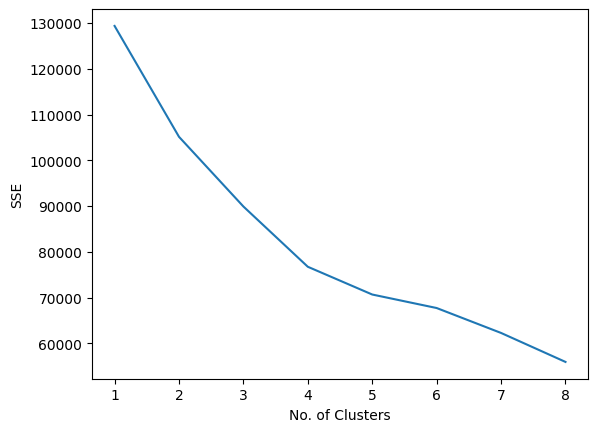

In [29]:
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")
plt.plot(k_range,sse)
plt.show()

## 8. KMeans

In [30]:
kmeans_pc = KMeans(n_clusters=2)

In [31]:
kmeans_pc.fit(pc_df)

KMeans(n_clusters=2)

In [32]:
kmeans_pc.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
pc_df[:1]

array([[-1.68222026, -1.07645061, -0.48850652,  0.66555177, -0.01822453,
        -0.05062893, -0.82914441, -0.03930321]])

## 9. Dataframe

In [34]:
pc_df = pd.DataFrame(pc_df, columns=[f'Component{i}' for i in range(1,9)])

In [35]:
pc_df.head(2)

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8
0,-1.682220,-1.076451,-0.488507,0.665552,-0.018225,-0.050629,-0.829144,-0.039303
1,-1.138295,2.506477,-0.601212,-0.120437,-0.605803,1.136841,0.374507,0.132411


In [36]:
pc_df["labels"] = kmeans_pc.labels_

In [37]:
pc_df[:1]

,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Component8,labels
0,-1.68222,-1.076451,-0.488507,0.665552,-0.018225,-0.050629,-0.829144,-0.039303,0


In [38]:
pc_df.labels.value_counts()

labels
0    5319
1    3631
Name: count, dtype: int64

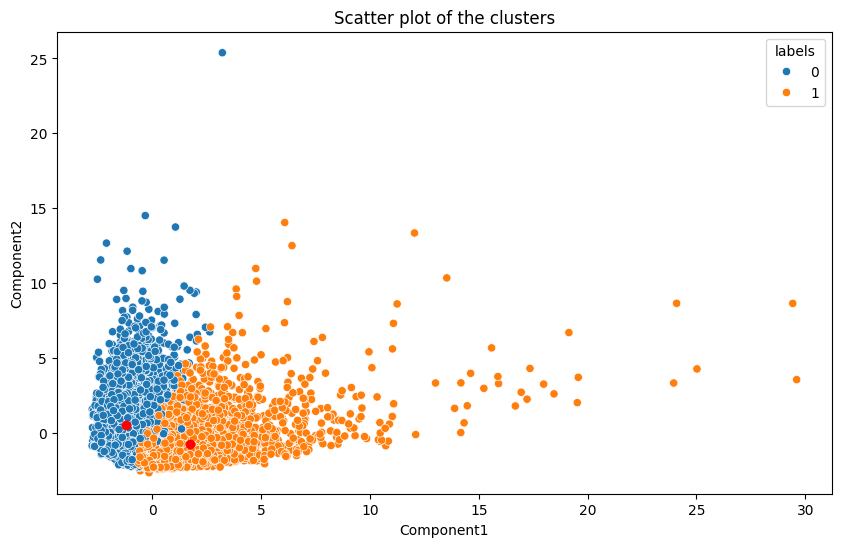

In [39]:
# scatter plot
plt.figure(figsize=(10,6))
plt.title("Scatter plot of the clusters")
sns.scatterplot(data = pc_df , x= "Component1" , y="Component2", hue = "labels")
plt.scatter(kmeans_pc.cluster_centers_[:,0],kmeans_pc.cluster_centers_[:,1], c="red", label="centroid" )
plt.show()

---

## Robust scaling

In [40]:
from sklearn.preprocessing import RobustScaler

In [41]:
Rscaler = RobustScaler()

In [42]:
Rscaled_df = Rscaler.fit_transform(df)

In [43]:
Rscaled_df[:1]

array([[-0.43226678, -1.63636364, -0.24837108, -0.06581169,  0.01365661,
         0.        , -0.39999928, -0.27777667, -0.111112  ,  0.        ,
         0.        , -0.3125    , -0.40816327, -0.43159465, -0.28285691,
         0.        ,  0.        ]])

## PCA

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA()

In [46]:
pca.fit(Rscaled_df)

PCA()

## Explained variance ratio

In [47]:
pca.explained_variance_ratio_

array([3.07006673e-01, 2.19398406e-01, 1.27415073e-01, 8.47722617e-02,
       7.33397573e-02, 5.58395398e-02, 3.43372493e-02, 2.75921597e-02,
       2.12030154e-02, 1.56138249e-02, 1.16627738e-02, 9.05979478e-03,
       5.04479469e-03, 4.09889568e-03, 3.38117030e-03, 2.33584081e-04,
       1.02692480e-06])

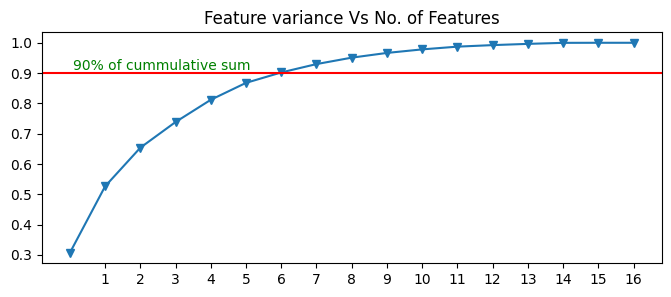

In [48]:
plt.figure(figsize=(8,3))
plt.title("Feature variance Vs No. of Features")
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="v")
plt.axhline(y=0.90, color="red")
plt.text(0.1, 0.91, "90% of cummulative sum", color = "g")
plt.xticks(np.arange(1,17))
plt.show()

In [49]:
pca = PCA(n_components=6)

In [50]:
pc_df= pca.fit_transform(Rscaled_df)

In [51]:
pc_df[:2]

array([[-2.47587198, -0.70991781, -0.854713  ,  0.25151398, -1.20939527,
         0.49650752],
       [-0.70654352,  1.92690513,  3.73926843, -1.442312  ,  1.43885303,
        -0.78216167]])

## elbow method

In [52]:
from sklearn.cluster import KMeans

In [53]:
sse = []

In [54]:
k_range = range(1,7)

In [55]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(pc_df)
    sse.append(km.inertia_)

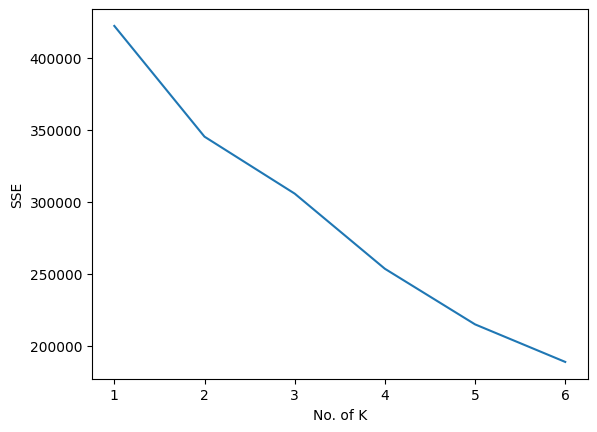

In [56]:
plt.xlabel("No. of K")
plt.ylabel("SSE")
plt.plot(k_range,sse)
plt.show()

## KMeans

In [57]:
kmeans_pc = KMeans(n_clusters=2)

In [58]:
kmeans_pc.fit(pc_df)

KMeans(n_clusters=2)

In [59]:
kmeans_pc.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
pc_df[:2]

array([[-2.47587198, -0.70991781, -0.854713  ,  0.25151398, -1.20939527,
         0.49650752],
       [-0.70654352,  1.92690513,  3.73926843, -1.442312  ,  1.43885303,
        -0.78216167]])

In [61]:
pc_df = pd.DataFrame(pc_df, columns = [f'Component{i}' for i in range(1,7)])

In [62]:
pc_df[:1]

,Component1,Component2,Component3,Component4,Component5,Component6
0,-2.475872,-0.709918,-0.854713,0.251514,-1.209395,0.496508


In [63]:
pc_df["Label"] = kmeans_pc.labels_

In [64]:
pc_df[:2]

,Component1,Component2,Component3,Component4,Component5,Component6,Label
0,-2.475872,-0.709918,-0.854713,0.251514,-1.209395,0.496508,0
1,-0.706544,1.926905,3.739268,-1.442312,1.438853,-0.782162,0


In [65]:
pc_df.Label.value_counts()

Label
0    8496
1     454
Name: count, dtype: int64

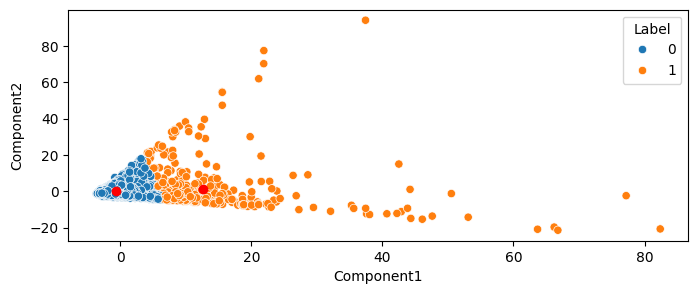

In [66]:
plt.figure(figsize=(8,3))
sns.scatterplot(data= pc_df, x= "Component1", y="Component2", hue= "Label")
plt.scatter(kmeans_pc.cluster_centers_[:,0], kmeans_pc.cluster_centers_[:,1], c = "red", label = "Centroid")
plt.show()

---

## MinMax Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
Mscaler = MinMaxScaler()

In [69]:
Mscaled_df = Mscaler.fit_transform(df)

In [70]:
Mscaled_df[:1]

array([[0.00214779, 0.818182  , 0.00194537, 0.        , 0.00424   ,
        0.        , 0.166667  , 0.        , 0.083333  , 0.        ,
        0.        , 0.00558659, 0.03171953, 0.00397863, 0.00182565,
        0.        , 1.        ]])

## PCA

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()

In [73]:
pca.fit(Mscaled_df)

PCA()

In [74]:
pca.explained_variance_ratio_

array([4.95972062e-01, 1.40540442e-01, 1.28444886e-01, 7.67657200e-02,
       6.96341162e-02, 3.58857827e-02, 1.81931037e-02, 1.35286304e-02,
       6.55491219e-03, 5.50923206e-03, 2.84138895e-03, 1.85835317e-03,
       1.26760866e-03, 1.22588168e-03, 1.05724309e-03, 7.20605839e-04,
       3.12590252e-08])

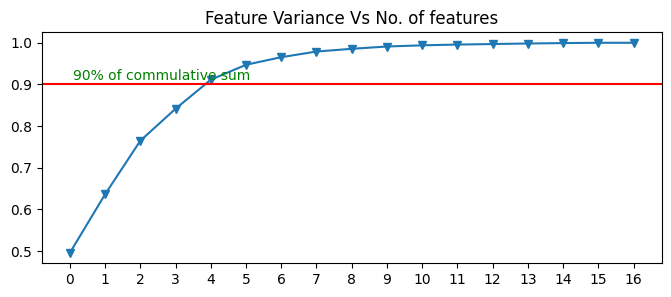

In [75]:
plt.figure(figsize=(8,3))
plt.title("Feature Variance Vs No. of features")
plt.plot(pca.explained_variance_ratio_.cumsum(), marker="v")
plt.axhline(y = 0.90, color="red")
plt.text(0.1, 0.91, "90% of commulative sum", color= "g")
plt.xticks(np.arange(0,17))
plt.show()

In [76]:
pca = PCA(n_components=4)

In [77]:
pc_df= pca.fit_transform(Mscaled_df)

In [78]:
pc_df[:1]

array([[-0.48216436, -0.09765617, -0.04645683,  0.05835458]])

## Elbow method

In [79]:
from sklearn.cluster import KMeans

In [80]:
sse = []

In [81]:
k_range = range(1,5)

In [82]:
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(pc_df)
    sse.append(km.inertia_)

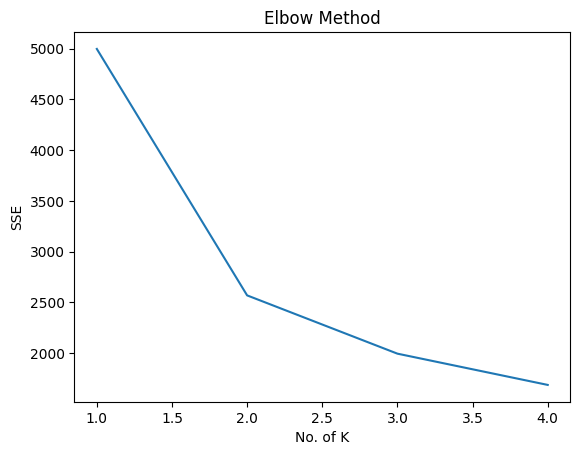

In [83]:
plt.xlabel("No. of K")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.plot(k_range,sse)
plt.show()

## KMeans

In [84]:
kmeans_pc = KMeans(n_clusters=2)

In [85]:
kmeans_pc.fit(pc_df)

KMeans(n_clusters=2)

In [86]:
kmeans_pc.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [87]:
pc_df[:1]

array([[-0.48216436, -0.09765617, -0.04645683,  0.05835458]])

In [88]:
pc_df = pd.DataFrame(pc_df, columns = [f'Component{i}' for i in range(1,5)])

In [89]:
pc_df["Label"] = kmeans_pc.labels_

In [90]:
pc_df[:2]

,Component1,Component2,Component3,Component4,Label
0,-0.482164,-0.097656,-0.046457,0.058355,0
1,-0.608577,-0.019379,0.082143,0.218686,0


In [91]:
pc_df.Label.value_counts()

Label
0    4917
1    4033
Name: count, dtype: int64

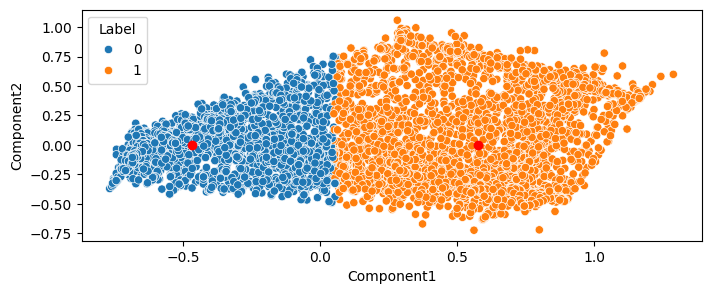

In [92]:
plt.figure(figsize=(8,3))
sns.scatterplot(data= pc_df, x= "Component1", y="Component2", hue= "Label")
plt.scatter(kmeans_pc.cluster_centers_[:,0], kmeans_pc.cluster_centers_[:,1], c = "red", label = "Centroid")
plt.show()

---